#### PURPOSE : FINAL ANALYSIS 

This notebook performs the final analysis of the trained machine learning model using the fully integrated preprocessing–model pipeline saved during training. The pipeline is loaded to ensure consistent data transformation and accurate interpretation of model behavior. The analysis includes extracting the underlying raw model, generating feature importance scores, and applying SHAP (SHapley Additive exPlanations) to explain individual and global prediction patterns. These visualizations and metrics provide insights into how each feature influences the model’s decision-making process, supporting transparency, interpretability, and robust evaluation of the final predictive system.

In [21]:
%run 00_project_setup.ipynb

##### 1. Load the Saved Pipeline

In [2]:

pipeline = load("../outputs/models/best_pipeline.joblib")
print("Pipeline loaded successfully!")

Pipeline loaded successfully!


##### 2. Extract the Raw Model from Inside the Pipeline

In [11]:
pipeline.named_steps   

{'imputer': SimpleImputer(strategy='median'),
 'scaler': StandardScaler(),
 'clf': GradientBoostingClassifier(n_estimators=200, random_state=42)}

In [12]:
raw_model = pipeline.named_steps["clf"]
print(raw_model)

GradientBoostingClassifier(n_estimators=200, random_state=42)


In [19]:
importances = raw_model.feature_importances_
feature_names = pipeline.named_steps["imputer"].get_feature_names_out()

fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

fi.head(10)


,Feature,Importance
0,Curricular units 2nd sem (approved),0.521877
1,Tuition fees up to date,0.073742
11,Curricular units 1st sem (approved),0.051821
6,Curricular units 2nd sem (enrolled),0.040106
2,Curricular units 2nd sem (grade),0.037633
8,Age at enrollment,0.036678
7,Course,0.036184
10,Curricular units 2nd sem (evaluations),0.033954
9,Curricular units 1st sem (evaluations),0.031732
12,Curricular units 1st sem (enrolled),0.031306


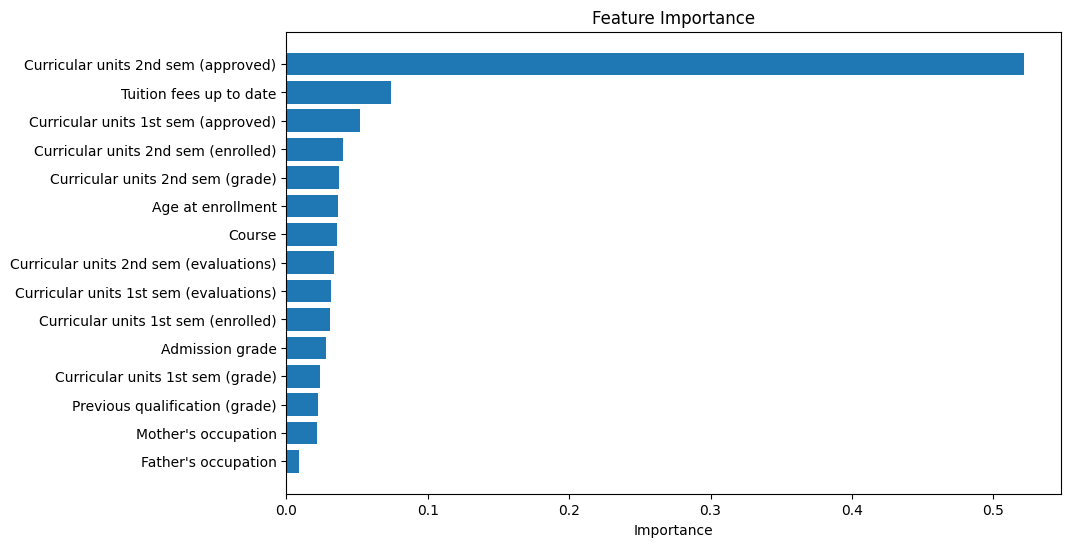

In [24]:
plt.figure(figsize=(10,6))
plt.barh(fi["Feature"], fi["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


##### 4. SHAP Analysis